In [36]:
import numpy as np
import random  
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
def get_points(n, std):
  xvalues = np.random.uniform(size=n)
  yvaluese = list()
  yvalues = list()
  e = np.random.normal(0, std, n)
  for i in range(n):
    yvalues.append(np.sin(2*math.pi*xvalues[i]))
    yvaluese.append(np.sin(2*np.pi*xvalues[i])+e[i])
  return xvalues, yvaluese, yvalues

In [37]:
def f(x, c):
    value = 0
    for i in range(len(c)):
        value += (x ** i) * c[i]
    return value

In [38]:
def get_value(x, y, i, c, Lambda):
    value = Lambda * c[i]
    for j in range(len(x)):
        value += (x[j] ** i) * (f(x[j], c) - y[j])
    return value

In [39]:
def get_coefficients(x, y, degree, Lambda):
    coefficients = np.zeros(degree + 1)

    for epoch in range(100):
        new_coefficients = []
        for i in range(degree + 1):
            new_coefficients.append(coefficients[i] - (1 / len(x)) * get_value(x, y, i, coefficients, Lambda))
        coefficients = np.array(new_coefficients)

    return coefficients

In [40]:
def plot(x, y, c):
    print("Coefficients: ", c)
    X = np.linspace(min(x), max(x))
    Y = f(X, c)
    plt.plot(x, y, 'x')
    plt.plot(X, Y)
    plt.grid()
    plt.legend(["Data points", "Regression curve"])
    plt.show()

In [41]:
def calculate_mean_absolute_error(actual, predicted, n):
    mae = 0
    for i in range(n):
        mae += abs(actual[i] - predicted[i])
    mae /= n
    print("Mean Absolute Error (MAE): ", mae)

In [42]:
def calculate_root_mean_squared_error(actual, predicted, n):
    mse = np.square(np.subtract(actual, predicted))
    mse = sum(mse) / n
    rmse = math.sqrt(mse)
    print("Root Mean Squared Error (RMSE): ", rmse)

In [43]:
def calculate_r_squared(actual, predicted, n):
    y_mean = np.mean(actual)

    num = 0
    den = 0
    for i in range(n):
        num += (predicted[i] - actual[i]) ** 2
        den += (actual[i] - y_mean) ** 2 
    r_squared = 1 - (num / den)
    print("R-squared: ", r_squared)

In [44]:
def print_evaluation_metrics(actual, predicted, n):
    calculate_root_mean_squared_error(actual, predicted, n)
    calculate_mean_absolute_error(actual, predicted, n)
    calculate_r_squared(actual, predicted, n)
    print("Best Score: ", calculate_score(actual, predicted))

In [45]:
def calculate_score(actual, predicted):
    score = np.mean((actual - predicted) ** 2)
    return score

In [49]:
Lambdas = np.logspace(-5, 1, 5)
print(Lambdas)

[1.00000000e-05 3.16227766e-04 1.00000000e-02 3.16227766e-01
 1.00000000e+01]


In [50]:
xtrain, ytraine, ytrain=get_points(1000, 0.5)

In [51]:
xtest, yteste, ytest=get_points(50, 0.5)

##Question 1

Lambda :  10.0
Root Mean Squared Error (RMSE):  11.996186694326923
Mean Absolute Error (MAE):  0.8404616009692963
R-squared:  -15.679771652442113
Best Score:  1.1512679616411687
Coefficients:  [ 0.83781346 -0.9589443  -1.18488327 -0.73727126 -0.24077472  0.15970083
  0.45349295  0.66019221  0.80178361]


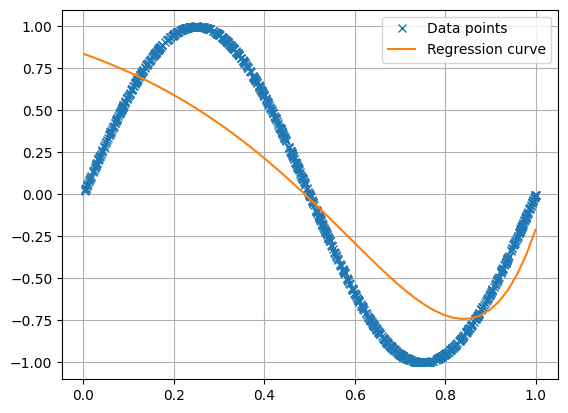

In [52]:
coeff1 = []
best_score = -1
best_Lambda = 0

for Lambda in Lambdas : 
    coeff = get_coefficients(xtrain , ytrain , 8 , Lambda)
    predy = f(xtrain , coeff)
    score = calculate_score(ytrain,predy)
    if(best_score == -1) :
        coeff1 = coeff
        beast_score , best_Lambda  = score , Lambda
    elif(score < best_score) : 
        coeff1 = coeff
        beast_score , best_Lambda  = score , Lambda
print("Lambda : " , best_Lambda)
predy = f(xtrain , coeff1)
print_evaluation_metrics(xtrain , ytrain , 8)
plot(xtrain, ytrain, coeff)

In [53]:
gammas = np.logspace(-2, 2, 5)
print(gammas)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


##Question 2

In [54]:
def regularized_kernel_regression(X, Y, test_X, gamma, Lambda):
    K = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            K[i, j] = rbf_kernel(X[i], X[j], gamma)
    K = K + Lambda*np.eye(len(X))
    C = np.linalg.solve(K, Y)
    y_pred = np.zeros(len(test_X))
    for i in range(len(test_X)):
        k = np.zeros(len(X))
        for j in range(len(X)):
            k[j] = rbf_kernel(test_X[i], X[j], gamma)
        y_pred[i] = np.dot(k, C)
    return y_pred

Best hyperparameters: gamma = 100.0 , Lambda = 1e-05
Root Mean Squared Error (RMSE):  1.0171909697968127
Mean Absolute Error (MAE):  0.8265146586070798
R-squared:  -1.0622100633318938
Best Score:  1.0346774690361804


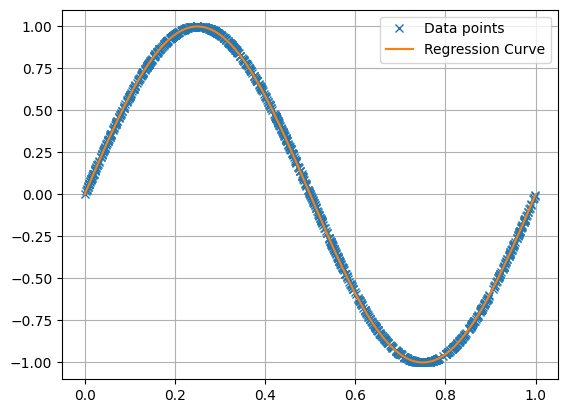

In [29]:
gammas = np.logspace(-2, 2, 5)
Lambdas = np.logspace(-5, 1, 5)

def rbf_kernel(x, y, Alpha):
    pow = -Alpha*np.linalg.norm(x - y)**2
    return np.exp(pow)

best_gamma, best_Lambda, best_score = None, None, float('inf')
for gamma in gammas:
    for Lambda in Lambdas:
        y_pred = regularized_kernel_regression(xtrain, ytrain, xtrain, gamma, Lambda)
        score = np.mean((ytrain - y_pred)**2)
        if score < best_score:
            best_gamma, best_Lambda, best_score = gamma, Lambda, score

print('Best hyperparameters: gamma =', best_gamma, ', Lambda =', best_Lambda)

X_test = np.linspace(0, 1, 1000)
y_pred = regularized_kernel_regression(xtrain, ytrain, X_test, best_gamma, best_Lambda)

print_evaluation_metrics(ytrain , y_pred , 1000)

plt.plot(xtrain, ytrain, '*')
plt.plot(X_test, y_pred)
plt.grid()
plt.legend(["Data points" , "Regression Curve"])
plt.show()

##Question 3

In [55]:
def regularized_kernel_regression(X_train, y_train, X_test, gamma, alpha):
    K = np.zeros((len(X_train), len(X_train)))
    for i in range(len(X_train)):
        for j in range(len(X_train)):
            K[i, j] = rbf_kernel(X_train[i], X_train[j], gamma)
    K = K + alpha*np.eye(len(X_train))
    w = np.linalg.solve(K, y_train)
    y_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        k = np.zeros(len(X_train))
        for j in range(len(X_train)):
            k[j] = rbf_kernel(X_test[i], X_train[j], gamma)
        y_pred[i] = np.dot(k, w)
    return y_pred

Best hyperparameters: gamma = 100.0 , Lambda = 1e-05
Root Mean Squared Error (RMSE):  1.0171909697968127
Mean Absolute Error (MAE):  0.8265146586070798
R-squared:  -1.0622100633318938
Best Score:  1.0346774690361804


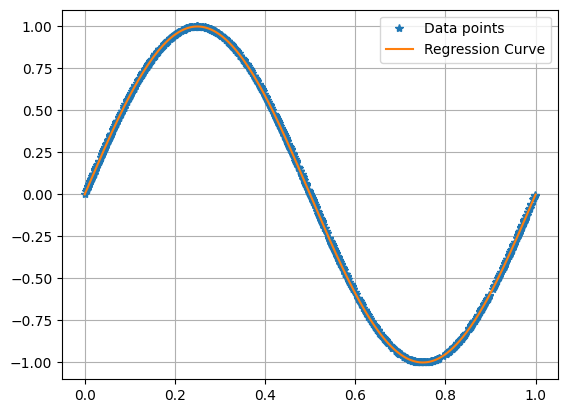

In [30]:
def rbf_kernel(x, y, gamma):
    return np.exp(-gamma*np.linalg.norm(x - y)**2)

best_gamma, best_Lambda, best_score = None, None, float('inf')
for gamma in gammas:
    for Lambda in Lambdas:
        y_pred = regularized_kernel_regression(xtrain, ytrain, xtrain, gamma, Lambda)
        score = np.mean((ytrain - y_pred)**2)
        if score < best_score:
            best_gamma, best_Lambda, best_score = gamma, Lambda, score

# Print the best hyperparameters
print('Best hyperparameters: gamma =', best_gamma, ', Lambda =', best_Lambda)

X_test = np.linspace(0, 1, 1000)
y_pred = regularized_kernel_regression(xtrain, ytrain, X_test, best_gamma, best_Lambda)

print_evaluation_metrics(ytrain , y_pred , 1000)

# Plot the results
plt.plot(xtrain, ytrain, '*')
plt.plot(X_test, y_pred)
plt.grid()
plt.legend(["Data points" , "Regression Curve"])
plt.show()


In [46]:
def regularized_kernel_regression1(X_train, y_train, X_test, gamma, alpha, learning_rate=0.1, n_iterations=1000):
    n_train = len(X_train)
    n_test = len(X_test)
    K_train = np.zeros((n_train, n_train))
    for i in range(n_train):
        for j in range(n_train):
            K_train[i, j] = rbf_kernel(X_train[i], X_train[j], gamma)
    K_train = K_train + alpha*np.eye(n_train)
    w = np.random.randn(n_train)
    for i in range(n_iterations):
        y_pred_train = np.dot(K_train, w)
        error = y_train - y_pred_train
        grad = -2*np.dot(K_train, error) + 2*alpha*w
        w = w - learning_rate*grad
    K_test = np.zeros((n_test, n_train))
    for i in range(n_test):
        for j in range(n_train):
            K_test[i, j] = rbf_kernel(X_test[i], X_train[j], gamma)
    y_pred_test = np.dot(K_test, w)
    return y_pred_test

Best hyperparameters: gamma = 100.0 , Lambda = 1e-05
Root Mean Squared Error (RMSE):  1.0171909697968127
Mean Absolute Error (MAE):  0.8265146586070798
R-squared:  -1.0622100633318938
Best Score:  1.0346774690361804


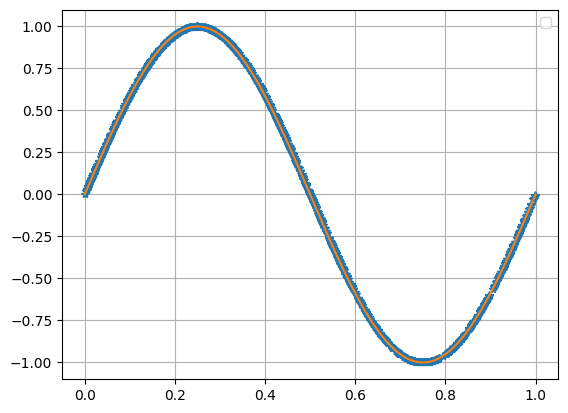

In [31]:
best_gamma, best_Lambda, best_score = None, None, float('inf')
for gamma in gammas:
    for Lambda in Lambdas:
        y_pred = regularized_kernel_regression(xtrain, ytrain, xtrain, gamma, Lambda)
        score = np.mean((ytrain - y_pred)**2)
        if score < best_score:
            best_gamma, best_Lambda, best_score = gamma, Lambda, score

# Print the best hyperparameters
print('Best hyperparameters: gamma =', best_gamma, ', Lambda =', best_Lambda)

X_test = np.linspace(0, 1, 1000)
y_pred = regularized_kernel_regression(xtrain, ytrain, X_test, best_gamma, best_Lambda)

print_evaluation_metrics(ytrain , y_pred , 1000)

# Plot the results
plt.plot(xtrain,ytrain, '*')
plt.plot(X_test, y_pred)
plt.grid()
plt.legend(["Data points" , "Regression Curve"])
plt.legend()
plt.show()


##Question 4

In [32]:
List = random.sample(range(0,len(xtrain)), 20)
for index in List : 
    xtrain[index] += 25

Best hyperparameters: gamma = 100.0 , Lambda = 1e-05
Root Mean Squared Error (RMSE):  1.0171909776674448
Mean Absolute Error (MAE):  0.8265146654934636
R-squared:  -1.0622100952450686
Best Score:  1.0346774850480518


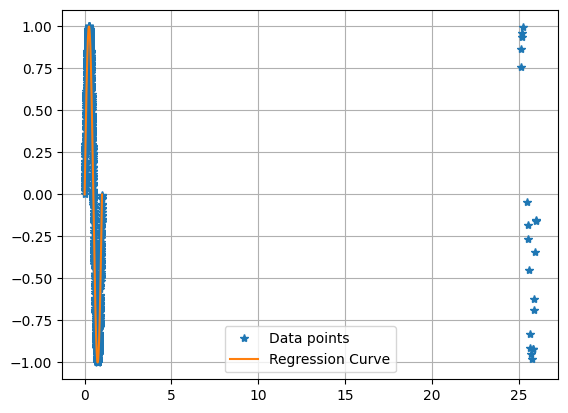

In [33]:
best_gamma, best_Lambda, best_score = None, None, float('inf')

gammas = np.logspace(-2, 2, 5)
Lambdas = np.logspace(-5, 1, 5)

for gamma in gammas:
    for Lambda in Lambdas:
        y_pred = regularized_kernel_regression(xtrain, ytrain, xtrain, gamma, Lambda)
        score = np.mean((ytrain - y_pred)**2)
        if score < best_score:
            best_gamma, best_Lambda, best_score = gamma, Lambda, score

print('Best hyperparameters: gamma =', best_gamma, ', Lambda =', best_Lambda)

X_test = np.linspace(0, 1, 1000)    
y_pred = regularized_kernel_regression(xtrain, ytrain, X_test, best_gamma, best_Lambda)

print_evaluation_metrics(ytrain , y_pred , 1000)
plt.plot(xtrain, ytrain, '*')
plt.plot(X_test, y_pred)
plt.grid()
plt.legend(["Data points" , "Regression Curve"])
plt.show()


##Question 5

In [34]:
df = pd.read_csv("/content/drive/MyDrive/motorcycle.csv")
df

,x,y
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


Root Mean Squared Error (RMSE):  761.2453194536695
Mean Absolute Error (MAE):  759.7216413947027
R-squared:  -249.05542253353877
Best Score:  579494.4363901194


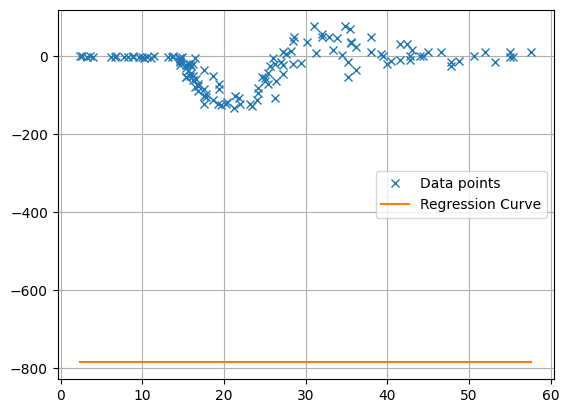

In [35]:
def sgd_regressor(df , learning_rate=1e-2, n_epochs=1000, k=16):
    
    w = np.zeros(len(df))  
    b = np.zeros(1)   

    epoch=1
    
    while epoch <= n_epochs:
        temp = df.sample(k)

        X_tr = temp.iloc[:,-2].values
        y_tr = temp.iloc[:,-1].values        

        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b  

In [56]:
def predict(x,w,b):
    y_pred=[]
    X_test = x
    y = np.dot(w,X_test)+b
    return y

Root Mean Squared Error (RMSE):  712.624133340548
Mean Absolute Error (MAE):  710.9962668205156
R-squared:  -218.13313792272896
Best Score:  507833.15541936725


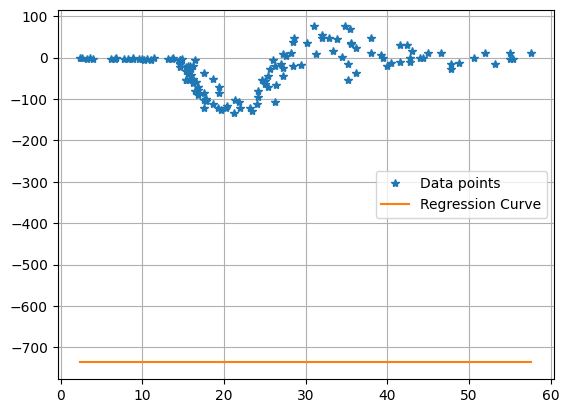

In [57]:
w,b = sgd_regressor(df)


X = df['x'].to_numpy()
Y = df['y'].to_numpy()

y_pred = predict(X,w,b)

print_evaluation_metrics(Y , y_pred , len(X))

plt.plot(X , Y , '*')
plt.plot(X,y_pred)
plt.grid()
plt.legend(["Data points" , "Regression Curve"])
plt.show()